In [1]:
from standardInclude import *

Welcome to JupyROOT 6.20/04
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [3]:
from io import StringIO
import urllib.request
import csv
allRunsVec = []
runVec = []
#runs = [x for x in range(15922,15923)]+[x for x in range(24298,24300)]
#runs = [24300, 24350]
#runs = [x for x in range(24300,24301)] 
#runs = [x for x in range(26198,26202)]
#runs = [x for x in range(24339, 24339+1)]
#runs = [x for x in range(24575, 24580,1)]
#runs = [x for x in range(32770, 32775,1)]
runs = [29905]

nAttempts = [0 for i in range(24)]

print(runs)
for run in runs:
    print("Starting run:", run)
    xtalGainVec = [-1 for i in range(1296)]
    for calo in range(1,25):
        gotoNextCalo = False
        numberOfAttempts = 0
        while(not gotoNextCalo):
            nAttempts[calo-1] += 1
            numberOfAttempts +=1
            if(numberOfAttempts > 20):
                print("ERROR: Unable to read values for calo", calo)
                gotoNextCalo = True
            
            #db_request = ("http://dbdata0vm.fnal.gov:9091/QE/gm2/dev/app/SQ/query?dbname=postgres_dev&t=" # worked for run 1-3
            db_request = ("https://dbdata0vm.fnal.gov:9443/QE/gm2/dev/app/SQ/query?dbname=postgres_dev&t=" # works for run4+
                          +"nearline_sync_energy_constants&w=validfromrun:"
                          +str(run)+"&w=calonum:"
                          +str(calo)+"&w=isvalid:t&o=-validfromrun&o=-generatedtime&l=1")
            print(db_request)
            ding = urllib.request.urlopen(db_request)
            ding = ding.read()

            f = StringIO(str(ding))
            #print(f)
            reader = csv.reader(f, delimiter=',')
            for item in reader:
                #print(len(item), item)
                if(len(item) > 1):
                    gotoNextCalo = True
                try:
                    ding = (item[10])[1:-1].split(",")
                    #print(ding)
                    for xtali, dong in enumerate(ding):
                        #xtalGainVec.append(float(dong))
                        xtalGainVec[(calo-1)*54 + xtali] = float(dong)
                except:
                    continue
    if(len(xtalGainVec) > 0):
        allRunsVec.append(xtalGainVec)
        runVec.append(run)
        if(-1 in xtalGainVec):
            print("ERROR: Some calorimeters missing")

[29905]
Starting run: 29905
https://dbdata0vm.fnal.gov:9443/QE/gm2/dev/app/SQ/query?dbname=postgres_dev&t=nearline_sync_energy_constants&w=validfromrun:29905&w=calonum:1&w=isvalid:t&o=-validfromrun&o=-generatedtime&l=1
https://dbdata0vm.fnal.gov:9443/QE/gm2/dev/app/SQ/query?dbname=postgres_dev&t=nearline_sync_energy_constants&w=validfromrun:29905&w=calonum:2&w=isvalid:t&o=-validfromrun&o=-generatedtime&l=1
https://dbdata0vm.fnal.gov:9443/QE/gm2/dev/app/SQ/query?dbname=postgres_dev&t=nearline_sync_energy_constants&w=validfromrun:29905&w=calonum:3&w=isvalid:t&o=-validfromrun&o=-generatedtime&l=1
https://dbdata0vm.fnal.gov:9443/QE/gm2/dev/app/SQ/query?dbname=postgres_dev&t=nearline_sync_energy_constants&w=validfromrun:29905&w=calonum:4&w=isvalid:t&o=-validfromrun&o=-generatedtime&l=1
https://dbdata0vm.fnal.gov:9443/QE/gm2/dev/app/SQ/query?dbname=postgres_dev&t=nearline_sync_energy_constants&w=validfromrun:29905&w=calonum:5&w=isvalid:t&o=-validfromrun&o=-generatedtime&l=1
https://dbdata0vm

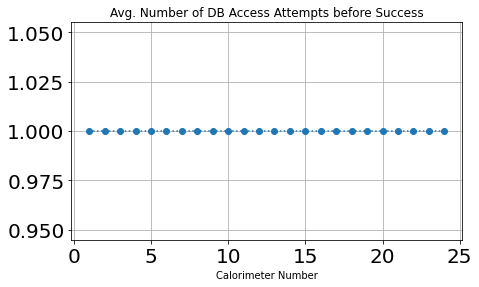

In [4]:
fig,ax = plt.subplots(figsize=(7,4))
plt.plot([i for i in range(1,25)],[x/len(runs) for x in nAttempts],"o:")
plt.title("Avg. Number of DB Access Attempts before Success")
plt.xlabel("Calorimeter Number")
plt.grid()
plt.show()

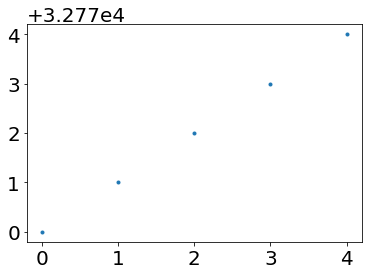

In [25]:
plt.plot(runVec,".")
plt.show()

In [26]:
print([len(x) for x in allRunsVec])

[1296, 1296, 1296, 1296, 1296]


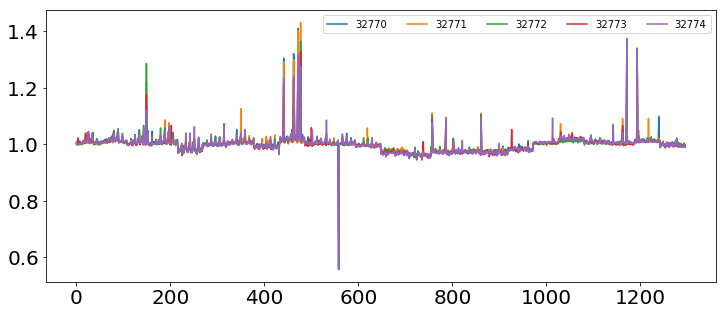

In [27]:
fig,ax = plt.subplots(figsize=(12,5))
for i, xtals in enumerate(allRunsVec):
    plt.plot(xtals,label=runVec[i])
    plt.legend(ncol=8)
    
#plt.xlim(110,125)
plt.show()

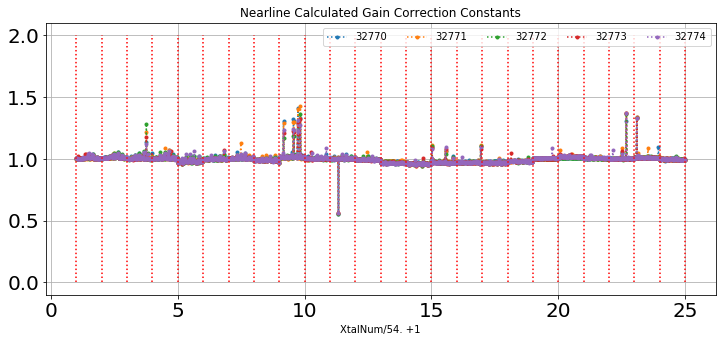

In [28]:
noint()
fig,ax = plt.subplots(figsize=(12,5))
for i, xtals in enumerate(allRunsVec):
    plt.plot([x/54.+1 for x in range(54*24)], xtals,".:",label=runVec[i])
plt.legend(ncol=5)
plt.title("Nearline Calculated Gain Correction Constants")
plt.xlabel("XtalNum/54. +1")
#plt.ylim(1,2.75)
#plt.xlim(2.9,4.1)
for i in range(1,26):
    plt.plot([i,i], [0,2], "r:")
plt.grid()
plt.show()

In [29]:
means = []
for x in allRunsVec:
    means.append(np.mean(x))

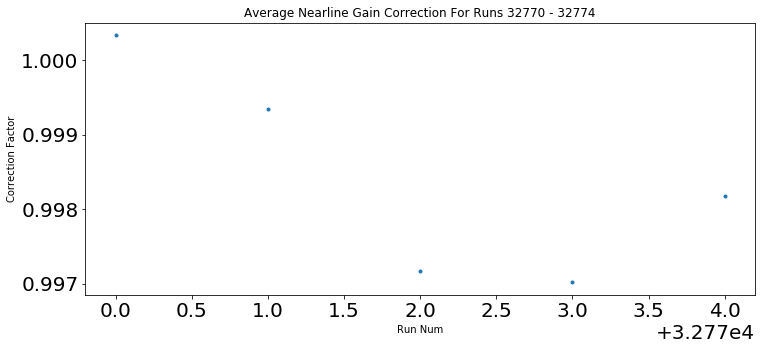

In [30]:
fig,ax = plt.subplots(figsize=(12,5))
plt.title("Average Nearline Gain Correction For Runs "+str(runVec[0])+" - "+str(runVec[len(runVec) -1]))
plt.ylabel("Correction Factor")
plt.xlabel("Run Num")
plt.plot(runVec,means,".")
plt.show()

In [31]:
averageGain = []
for x in zip(*allRunsVec):
    #print(np.mean(x))
    averageGain.append(np.mean(x))

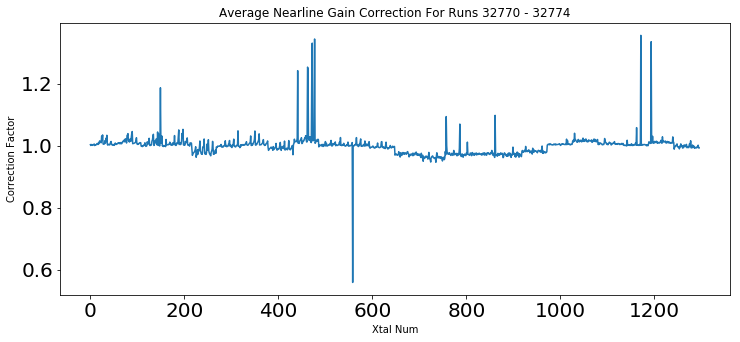

In [32]:
fig,ax = plt.subplots(figsize=(12,5))
plt.title("Average Nearline Gain Correction For Runs "+str(runVec[0])+" - "+str(runVec[len(runVec) -1]))
plt.ylabel("Correction Factor")
plt.xlabel("Xtal Num")
plt.plot(averageGain)
plt.show()

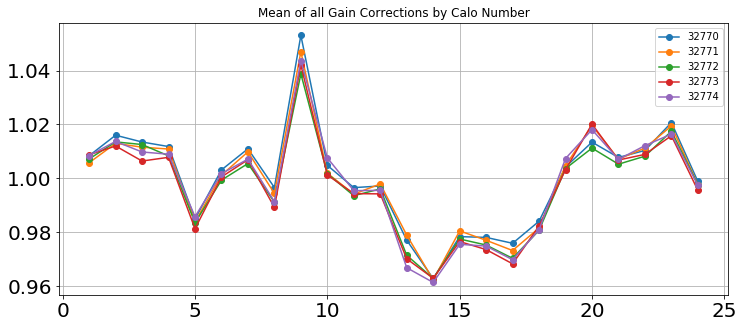

In [34]:
fig,ax = plt.subplots(figsize=(12,5))
for i, xtals in enumerate(allRunsVec):
    caloMean = []
    for calo in range(24):
        caloMean.append(np.mean(xtals[calo*54:(calo+1)*54]))
    plt.plot([x+1 for x in range(24)],caloMean,"-o",label=runVec[i])
plt.title("Mean of all Gain Corrections by Calo Number")
plt.legend()
plt.grid()
plt.show()